In [1]:
#import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
#load files
food_supply_to_load = "COVID_Diet_Data/Food_Supply_Quantity_kg_Data.csv"

#read file and store as dataframe
food_supply = pd.read_csv(food_supply_to_load)
pd
food_supply

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [3]:
country_count = len(food_supply["Country"].unique())
country_count

170

In [4]:
food_supply.head()


,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [5]:
#Top 10 countries with the most deaths
most_deaths = food_supply.sort_values("Deaths", ascending=False)
most_deaths

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
14,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,6.8161,32.2637,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,11515000.0,%
138,Slovenia,4.9933,1.1248,18.9196,0.0005,7.6345,0.5376,0.6515,6.4367,4.1610,...,5.0020,31.0774,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,%
159,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,4.5851,31.1116,29.5,<2.5,5.868483,0.167220,0.015161,5.686102,67160000.0,%
38,Czechia,9.8498,0.8945,17.8065,0.0006,5.6937,0.4964,0.5355,3.3962,4.7618,...,4.5289,32.1944,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%
74,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,6.9463,30.9671,22.9,<2.5,4.353685,0.150927,3.494529,0.708229,60296000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Kiribati,0.2970,0.0486,8.8958,0.0000,8.2747,0.1640,6.1065,5.8907,2.3856,...,4.1389,41.1042,45.6,2.7,NaN,NaN,NaN,NaN,125000.0,%
81,"Korea, North",0.8981,0.0010,3.3933,0.0010,17.9378,0.4668,1.1568,6.1383,1.3872,...,12.8082,46.6046,7.1,47.8,NaN,NaN,NaN,NaN,25779000.0,%
105,Myanmar,0.2195,0.1751,13.5188,0.0034,16.7608,0.4613,4.0424,4.0287,4.9753,...,7.0725,36.4807,5.7,10.6,NaN,NaN,NaN,NaN,54704000.0,%
109,New Caledonia,5.0363,0.0821,11.7818,0.0804,8.5840,0.7494,2.0361,5.5855,5.8687,...,5.5941,38.2208,NaN,7.1,NaN,NaN,NaN,NaN,295000.0,%


In [6]:
for col in food_supply.columns:
    print(col)


Country
Alcoholic Beverages
Animal fats
Animal Products
Aquatic Products, Other
Cereals - Excluding Beer
Eggs
Fish, Seafood
Fruits - Excluding Wine
Meat
Milk - Excluding Butter
Miscellaneous
Offals
Oilcrops
Pulses
Spices
Starchy Roots
Stimulants
Sugar & Sweeteners
Sugar Crops
Treenuts
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)


In [7]:
sugars = food_supply["Sugar & Sweeteners"] + food_supply["Sugar Crops"]
sugars

0      1.3489
1      1.5367
2      1.8342
3      1.8495
4      3.8749
        ...  
165    3.4106
166    2.0996
167    5.0468
168    1.5632
169    4.6485
Length: 170, dtype: float64

In [8]:
print(sugars)

0      1.3489
1      1.5367
2      1.8342
3      1.8495
4      3.8749
        ...  
165    3.4106
166    2.0996
167    5.0468
168    1.5632
169    4.6485
Length: 170, dtype: float64


In [9]:
categories = food_supply.copy()
categories

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [10]:
for col in categories.columns:
    print(col)

Country
Alcoholic Beverages
Animal fats
Animal Products
Aquatic Products, Other
Cereals - Excluding Beer
Eggs
Fish, Seafood
Fruits - Excluding Wine
Meat
Milk - Excluding Butter
Miscellaneous
Offals
Oilcrops
Pulses
Spices
Starchy Roots
Stimulants
Sugar & Sweeteners
Sugar Crops
Treenuts
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)


In [11]:
categories["Sugars %"] = ""
categories["Aquatic Seafood %"] = ""
categories["Meats & Animal Products %"] = ""
categories["Vegetables %"] = ""


for col in categories.columns:
    print(col)

Country
Alcoholic Beverages
Animal fats
Animal Products
Aquatic Products, Other
Cereals - Excluding Beer
Eggs
Fish, Seafood
Fruits - Excluding Wine
Meat
Milk - Excluding Butter
Miscellaneous
Offals
Oilcrops
Pulses
Spices
Starchy Roots
Stimulants
Sugar & Sweeteners
Sugar Crops
Treenuts
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)
Sugars %
Aquatic Seafood %
Meats & Animal Products %
Vegetables %


In [12]:
categories["Sugars (%)"] = categories["Sugar & Sweeteners"] + categories["Sugar Crops"]
categories

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars %,Aquatic Seafood %,Meats & Animal Products %,Vegetables %,Sugars (%)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.006186,0.123374,0.012574,38928000.0,%,,,,,1.3489
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.050951,1.792636,1.123714,2838000.0,%,,,,,1.5367
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.006558,0.167572,0.070767,44357000.0,%,,,,,1.8342
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.001461,0.056808,0.003419,32522000.0,%,,,,,1.8495
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.007143,0.190816,0.095918,98000.0,%,,,,,3.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,0.004287,0.424399,0.023899,28645000.0,%,,,,,3.4106
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,0.000036,0.001526,0.000501,96209000.0,%,,,,,2.0996
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,0.002062,0.004788,0.000282,29826000.0,%,,,,,5.0468
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.004564,0.290524,0.039045,18384000.0,%,,,,,1.5632


In [13]:
categories["Aquatic Seafood (%)"] = categories["Aquatic Products, Other"] + categories["Fish, Seafood"]
categories

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Population,Unit (all except Population),Sugars %,Aquatic Seafood %,Meats & Animal Products %,Vegetables %,Sugars (%),Aquatic Seafood (%)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.123374,0.012574,38928000.0,%,,,,,1.3489,0.0350
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,1.792636,1.123714,2838000.0,%,,,,,1.5367,0.2126
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.167572,0.070767,44357000.0,%,,,,,1.8342,0.2416
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.056808,0.003419,32522000.0,%,,,,,1.8495,1.7707
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.190816,0.095918,98000.0,%,,,,,3.8749,4.1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,0.424399,0.023899,28645000.0,%,,,,,3.4106,0.9456
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,0.001526,0.000501,96209000.0,%,,,,,2.0996,2.6434
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,0.004788,0.000282,29826000.0,%,,,,,5.0468,0.5240
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.290524,0.039045,18384000.0,%,,,,,1.5632,1.6924


In [14]:
categories["Meats & Animal Products %"] = categories["Meat"] + categories["Offals"] + categories["Eggs"] + categories["Animal Products"]
categories

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Population,Unit (all except Population),Sugars %,Aquatic Seafood %,Meats & Animal Products %,Vegetables %,Sugars (%),Aquatic Seafood (%)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.123374,0.012574,38928000.0,%,,,11.0517,,1.3489,0.0350
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,1.792636,1.123714,2838000.0,%,,,21.4668,,1.5367,0.2126
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.167572,0.070767,44357000.0,%,,,11.3786,,1.8342,0.2416
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.056808,0.003419,32522000.0,%,,,7.1986,,1.8495,1.7707
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.190816,0.095918,98000.0,%,,,22.7994,,3.8749,4.1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,0.424399,0.023899,28645000.0,%,,,19.1360,,3.4106,0.9456
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,0.001526,0.000501,96209000.0,%,,,13.7373,,2.0996,2.6434
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,0.004788,0.000282,29826000.0,%,,,9.1151,,5.0468,0.5240
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.290524,0.039045,18384000.0,%,,,8.5071,,1.5632,1.6924


In [15]:
categories = categories.drop(columns=["Animal Products", "Aquatic Products, Other", "Eggs", "Offals", "Meat", "Sugars %", "Aquatic Seafood %", "Meats & Animal Products %", "Vegetables %" ])
categories

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,"Fish, Seafood",Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars (%),Aquatic Seafood (%)
0,Afghanistan,0.0014,0.1973,24.8097,0.0350,5.3495,7.5828,0.0728,0.0700,0.2953,...,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%,1.3489,0.0350
1,Albania,1.6719,0.1357,5.7817,0.2126,6.7861,15.7213,0.1123,0.9377,0.2380,...,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%,1.5367,0.2126
2,Algeria,0.2711,0.0282,13.6816,0.2416,6.3801,7.6189,0.1671,0.3493,0.4783,...,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1.8342,0.2416
3,Angola,5.8087,0.0560,9.1085,1.7707,6.0005,0.8311,0.1165,0.4186,0.6507,...,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,1.8495,1.7707
4,Antigua and Barbuda,3.5764,0.0087,5.9960,4.1489,10.7451,6.3663,0.7139,0.2172,0.1840,...,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%,3.8749,4.1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,0.9456,7.6460,9.3920,0.0702,0.0281,0.3342,...,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%,3.4106,0.9456
166,Vietnam,1.4591,0.1640,16.8740,2.6392,5.9029,0.6069,0.0126,0.8410,0.2032,...,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%,2.0996,2.6434
167,Yemen,0.0364,0.0446,27.2077,0.5240,5.1344,1.8911,0.2033,0.0893,0.8645,...,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%,5.0468,0.5240
168,Zambia,5.7360,0.0829,21.1938,1.6924,1.0183,1.7570,0.2149,1.8736,0.1756,...,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%,1.5632,1.6924


In [16]:
categories["Vegetables (%)"] = categories["Vegetables"] + categories["Starchy Roots"]
categories

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,"Fish, Seafood",Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,...,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars (%),Aquatic Seafood (%),Vegetables (%)
0,Afghanistan,0.0014,0.1973,24.8097,0.0350,5.3495,7.5828,0.0728,0.0700,0.2953,...,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%,1.3489,0.0350,7.6444
1,Albania,1.6719,0.1357,5.7817,0.2126,6.7861,15.7213,0.1123,0.9377,0.2380,...,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%,1.5367,0.2126,13.5849
2,Algeria,0.2711,0.0282,13.6816,0.2416,6.3801,7.6189,0.1671,0.3493,0.4783,...,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1.8342,0.2416,15.7824
3,Angola,5.8087,0.0560,9.1085,1.7707,6.0005,0.8311,0.1165,0.4186,0.6507,...,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,1.8495,1.7707,20.4143
4,Antigua and Barbuda,3.5764,0.0087,5.9960,4.1489,10.7451,6.3663,0.7139,0.2172,0.1840,...,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%,3.8749,4.1489,6.9017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,0.9456,7.6460,9.3920,0.0702,0.0281,0.3342,...,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%,3.4106,0.9456,6.7117
166,Vietnam,1.4591,0.1640,16.8740,2.6392,5.9029,0.6069,0.0126,0.8410,0.2032,...,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%,2.0996,2.6434,13.0104
167,Yemen,0.0364,0.0446,27.2077,0.5240,5.1344,1.8911,0.2033,0.0893,0.8645,...,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%,5.0468,0.5240,4.2929
168,Zambia,5.7360,0.0829,21.1938,1.6924,1.0183,1.7570,0.2149,1.8736,0.1756,...,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%,1.5632,1.6924,11.4298


In [17]:
for col in categories.columns:
    print(col)

Country
Alcoholic Beverages
Animal fats
Cereals - Excluding Beer
Fish, Seafood
Fruits - Excluding Wine
Milk - Excluding Butter
Miscellaneous
Oilcrops
Pulses
Spices
Starchy Roots
Stimulants
Sugar & Sweeteners
Sugar Crops
Treenuts
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)
Sugars (%)
Aquatic Seafood (%)
Vegetables (%)


In [18]:
categories = categories.drop(columns=["Starchy Roots", "Vegetables", "Sugar Crops", "Sugar & Sweeteners", "Fish, Seafood"])
categories


,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,Spices,...,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars (%),Aquatic Seafood (%),Vegetables (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.0728,0.0700,0.2953,0.0574,...,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%,1.3489,0.0350,7.6444
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1123,0.9377,0.2380,0.0008,...,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%,1.5367,0.2126,13.5849
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.1671,0.3493,0.4783,0.0557,...,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1.8342,0.2416,15.7824
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.1165,0.4186,0.6507,0.0009,...,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,1.8495,1.7707,20.4143
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.7139,0.2172,0.1840,0.1524,...,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%,3.8749,4.1489,6.9017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.0702,0.0281,0.3342,0.0009,...,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%,3.4106,0.9456,6.7117
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.0126,0.8410,0.2032,0.2074,...,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%,2.0996,2.6434,13.0104
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2033,0.0893,0.8645,0.0347,...,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%,5.0468,0.5240,4.2929
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.2149,1.8736,0.1756,0.0478,...,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%,1.5632,1.6924,11.4298


In [19]:
for col in categories.columns:
    print(col)
    

Country
Alcoholic Beverages
Animal fats
Cereals - Excluding Beer
Fruits - Excluding Wine
Milk - Excluding Butter
Miscellaneous
Oilcrops
Pulses
Spices
Stimulants
Treenuts
Vegetable Oils
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)
Sugars (%)
Aquatic Seafood (%)
Vegetables (%)


In [20]:
categories["Other %"] = ""
for col in categories.columns:
    print(col)

Country
Alcoholic Beverages
Animal fats
Cereals - Excluding Beer
Fruits - Excluding Wine
Milk - Excluding Butter
Miscellaneous
Oilcrops
Pulses
Spices
Stimulants
Treenuts
Vegetable Oils
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)
Sugars (%)
Aquatic Seafood (%)
Vegetables (%)
Other %


In [21]:
categories["Other (%)"] = categories["Miscellaneous"] + categories["Oilcrops"] + categories["Pulses"] + categories["Spices"] + categories["Treenuts"] 
categories

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Miscellaneous,Oilcrops,Pulses,Spices,...,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars (%),Aquatic Seafood (%),Vegetables (%),Other %,Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.0728,0.0700,0.2953,0.0574,...,0.006186,0.123374,0.012574,38928000.0,%,1.3489,0.0350,7.6444,,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1123,0.9377,0.2380,0.0008,...,0.050951,1.792636,1.123714,2838000.0,%,1.5367,0.2126,13.5849,,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.1671,0.3493,0.4783,0.0557,...,0.006558,0.167572,0.070767,44357000.0,%,1.8342,0.2416,15.7824,,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.1165,0.4186,0.6507,0.0009,...,0.001461,0.056808,0.003419,32522000.0,%,1.8495,1.7707,20.4143,,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.7139,0.2172,0.1840,0.1524,...,0.007143,0.190816,0.095918,98000.0,%,3.8749,4.1489,6.9017,,1.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.0702,0.0281,0.3342,0.0009,...,0.004287,0.424399,0.023899,28645000.0,%,3.4106,0.9456,6.7117,,0.4343
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.0126,0.8410,0.2032,0.2074,...,0.000036,0.001526,0.000501,96209000.0,%,2.0996,2.6434,13.0104,,1.5712
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2033,0.0893,0.8645,0.0347,...,0.002062,0.004788,0.000282,29826000.0,%,5.0468,0.5240,4.2929,,1.1935
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.2149,1.8736,0.1756,0.0478,...,0.004564,0.290524,0.039045,18384000.0,%,1.5632,1.6924,11.4298,,2.3133


In [22]:
categories = categories.drop(columns=["Miscellaneous", "Oilcrops", "Pulses", "Spices", "Treenuts", "Other %", "Unit (all except Population)"])
categories

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Stimulants,Vegetable Oils,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,20.4143,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,3.8749,4.1489,6.9017,1.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.1479,1.3734,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,3.4106,0.9456,6.7117,0.4343
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,2.0996,2.6434,13.0104,1.5712
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2199,1.0811,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,5.0468,0.5240,4.2929,1.1935
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.0618,0.6657,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,1.5632,1.6924,11.4298,2.3133


In [23]:
for col in categories.columns:
    print(col)
    

Country
Alcoholic Beverages
Animal fats
Cereals - Excluding Beer
Fruits - Excluding Wine
Milk - Excluding Butter
Stimulants
Vegetable Oils
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Sugars (%)
Aquatic Seafood (%)
Vegetables (%)
Other (%)


In [24]:
categories.rename(columns = {'Alcoholic Beverages':'Alcoholic Beverages (%)','Animal fats':'Animal fats (%)', 'Cereals - Excluding Beer': 'Cereals - Excluding Beer (%)', 'Fruits - Excluding Wine': 'Fruits (%)', 'Milk - Excluding Butter': 'Milk (%)', 'Stimulants': 'Stimulants (%)', 'Vegetable Oils': 'Vegetable Oils (%)', 'Vegetal Products': 'Vegetal Products (%)', 'Obesity': 'Obesity (%)', 'Undernourished': 'Undernourished (%)', 'Confirmed': 'Confirmed Cases (%)', 'Deaths': 'Deaths (%)', 'Recovered':'Recovered (%)', 'Active': 'Active (%)', 'Population': 'Population'},inplace = True)
categories

,Country,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Obesity (%),Undernourished (%),Confirmed Cases (%),Deaths (%),Recovered (%),Active (%),Population,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,20.4143,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,3.8749,4.1489,6.9017,1.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.1479,1.3734,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,3.4106,0.9456,6.7117,0.4343
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,2.0996,2.6434,13.0104,1.5712
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2199,1.0811,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,5.0468,0.5240,4.2929,1.1935
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.0618,0.6657,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,1.5632,1.6924,11.4298,2.3133


In [25]:
categories_clean = categories.dropna().reset_index(drop=True)
categories_clean

,Country,Alcoholic Beverages (%),Animal fats (%),Cereals - Excluding Beer (%),Fruits (%),Milk (%),Stimulants (%),Vegetable Oils (%),Vegetal Products (%),Obesity (%),Undernourished (%),Confirmed Cases (%),Deaths (%),Recovered (%),Active (%),Population,Sugars (%),Aquatic Seafood (%),Vegetables (%),Other (%)
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,7.6444,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,13.5849,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,15.7824,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,20.4143,1.1928
4,Argentina,4.2672,0.2234,8.4102,6.0435,10.2328,0.4378,0.9541,30.6559,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,3.0536,0.4693,7.3923,0.0966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.1479,1.3734,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,3.4106,0.9456,6.7117,0.4343
150,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,2.0996,2.6434,13.0104,1.5712
151,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2199,1.0811,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,5.0468,0.5240,4.2929,1.1935
152,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.0618,0.6657,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,1.5632,1.6924,11.4298,2.3133


In [26]:
categories_clean.columns

Index(['Country', 'Alcoholic Beverages (%)', 'Animal fats (%)',
       'Cereals - Excluding Beer (%)', 'Fruits (%)', 'Milk (%)',
       'Stimulants (%)', 'Vegetable Oils (%)', 'Vegetal Products (%)',
       'Obesity (%)', 'Undernourished (%)', 'Confirmed Cases (%)',
       'Deaths (%)', 'Recovered (%)', 'Active (%)', 'Population', 'Sugars (%)',
       'Aquatic Seafood (%)', 'Vegetables (%)', 'Other (%)'],
      dtype='object')

In [27]:
def scatter_plot(x, y):
    
    #linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x, y)
    pe_fit = pe_slope * x + pe_int
    
    
    # Create a scatter plot
    plt.scatter(x, y, marker="o", facecolors="plum", edgecolors="indigo")
    
    # Add linear model
    plt.plot(x, pe_fit, linewidth=1.5, color="tomato")
    
    # Add labels and title
    plt.title(f'{x.name} vs. {y.name}', size="14", weight="bold")
    plt.xlabel(x.name, size="12")
    plt.ylabel(y.name, size="12")

    # Save the figure
    plt.savefig("..\output_data\Fig1.png")

The correlation between Deaths (%) and diet composition of Vegetables (%) is -0.23.


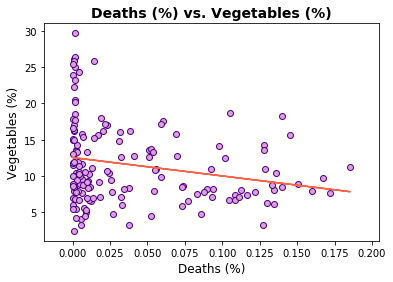

In [57]:
x = categories_clean["Deaths (%)"]
y = categories_clean["Vegetables (%)"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)
new_plot_1